# Cấu trúc dữ liệu và giải thuật

# Bài 2: Circular queue và ứng dụng 

### BS. Lê Ngọc Khả Nhi

Chào các bạn, đây là bài thứ 2 của series về Data structure và Algorithms trong ngôn ngữ Python. Series này không trình bày một cách hệ thống và thứ tự về tất cả kiểu cấu trúc dữ liệu và các loại algorithm; nhưng sẽ giới thiệu một cách ngẫu hứng những bài toán thực tế mà Nhi đã gặp trong quá trình làm việc. Trong bài hôm nay, chúng ta tìm hiểu về một cấu trúc dữ liệu trừu tượng cho phép tạo ra cửa sổ trượt (sliding window) trên dữ liệu chuỗi thời gian, đó là vòng dữ liệu tuần hoàn (circular queue hay circular/ring buffer).


# Bài toán thực tế

Với một cảm biến trên đồng hồ đeo tay, ta có thể ghi nhận giá trị huyết áp tâm thu và tâm trương của một bệnh nhân mỗi giờ 1 lần, liên tục ngày này qua ngày khác. Yêu cầu đặt ra là dùng một cửa sổ trượt để ước tính giá trị trung bình động của huyết áp trong 24h, cập nhật kết quả mới sau mỗi giờ và lưu lại kết quả để vẽ một biểu đồ của 30 ngày gần nhất.

# Vòng dữ liệu

Vòng dữ liệu tuần hoàn (Circular hay Ring buffer) là một cấu trúc dữ liệu rất hiệu quả để tạo cửa sổ trượt với kích thước cố định. Circular buffer hoạt động theo cơ chế tuần hoàn và khép kín (xoay vòng). Khi mới tạo ra, ta có một vòng với kích thước N ngăn chứa, sau đó ta có thể nhập dữ liệu vào mỗi ngăn. Khi tất cả các ngăn đều đầy, cơ chế tuần hoàn được kích hoạt: mỗi khi ta nhập dữ liệu mới, nó được ghi đè lên vị trí đầu đồng thời xóa dữ liệu cũ nhất ra khỏi vòng. Như vậy cửa sổ trượt được chuyển thành một bánh xe lăn theo độ dài của chuỗi thời gian.

Vòng dữ liệu tuần hoàn được xây dựng như 1 Class, với cấu trúc và nội dung như sau:

In [2]:
class Circular_Queue:
    
    '''Class cấu trúc dữ liệu chuỗi tuần hoàn
    
    Cải biên từ source code của George Heineman
    
    Là một iterable data structure, sử dụng như một bộ nhớ đệm (buffer)
    tuần hoàn (hay cửa sổ trượt), cho phép nhập và xóa dữ liệu với nguyên tắc
    LIFO, với hiệu suất hằng định O(1)
    
    @ Thuộc tính: 
      size (int): Kích thước của vòng (số slot dữ liệu) 
      dtype : kiểu dữ liệu : float, int, obj...
      tail (int): vị trí đuôi của vòng (khởi đầu : 0)
      head (int): vị trí đầu của vòng (khởi đầu: 0)
      count (int): tổng số slot có chứa dữ liệu (rỗng = 0, đầy = size)
      queue (np 1D array): chuỗi dữ liệu
    
    @ Instance methods:
      isEmpty, isFull, __len__, add, remove
    
    '''
    
    def __init__(self, size, dtype):
        """Khởi tạo 1 vòng dữ liệu với kích thước = size
        """
        self.queue = np.array([np.nan]*size, dtype = dtype) # Sử dụng numpy array làm cơ sở
        self.tail = 0
        self.head = 0
        self.size = size
        self.count = 0

    def isEmpty(self):
        """Kiểm tra trạng thái rỗng của vòng"""
        return self.count == 0

    def isFull(self):
        """Kiểm tra trạng thái bão hòa của vòng"""
        return self.count == self.size
        
    def __len__(self):
        """Khảo sát số item hiện có trong vòng"""
        return self.count
        
    def add(self, value):
        """Thêm hoặc ghi đè dữ liệu tại vị trí đầu"""
        if self.isFull():
            self.tail = (self.tail+1) % self.size # hiệu ứng tuần hoàn
        else:
            self.count += 1
        self.queue[self.head] = value
        self.head = (self.head + 1) % self.size
    
    def remove(self):
        """Xóa dữ liệu cũ nhất trên vòng"""
        if self.count == 0:
            raise Exception ("Không có dữ liệu để xóa, vòng đang rỗng")
        
        value = self.queue[self.tail]
        self.tail = (self.tail + 1) % self.size
        self.count -= 1
        return value
    
    def __iter__(self):
        """Truy xuất tuần tự nội dung trong vòng"""
        idx = self.tail
        n = self.count
        while n > 0:
            yield self.queue[idx]
            idx = (idx + 1) % self.size
            n -= 1

    def __repr__(self):
        """String representation mô tả object"""
        if self.isEmpty():
            return f'Vòng dữ liệu rỗng kích thước = {self.size}'

        return 'vòng:[' + ','.join(map(str,self)) + ']'

Trong thí dụ này, Nhi dùng numpy array làm cơ sở cho vòng tuần hoàn (bạn có thể dùng list cũng được). 

#### Class Circular_Queue có 6 thuộc tính: 

1) size (int): Kích thước của vòng (số slot dữ liệu) 

2) dtype : kiểu dữ liệu : float, int, obj...

3) tail (int): vị trí đuôi của vòng (khởi đầu : 0)

4) head (int): vị trí đầu của vòng (khởi đầu: 0)

5) count (int): tổng số slot có chứa dữ liệu (rỗng = 0, đầy = size)

6) queue (np 1D array): chuỗi dữ liệu

#### và các instance methods cho phép:

1) Kiểm tra trạng thái rỗng hay bão hòa của vòng

2) Thêm / cập nhật/ ghi đè dữ liệu mới

3) Xóa dữ liệu cũ nhất ra khỏi vòng

# Minh họa tính năng circular queue

In [13]:
import numpy as np

cq = Circular_Queue(10, 'float32')

In [5]:
cq

Vòng dữ liệu rỗng kích thước = 10

In [7]:
cq.queue

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [8]:
cq.size

10

In [9]:
cq.count

0

In [6]:
cq.isEmpty()

True

In [10]:
cq.isFull()

False

In [14]:
# Ghi dữ liệu

cq.add(0.9)

cq

vòng:[0.9]

In [15]:
cq.add(36)

cq.isEmpty()

False

In [16]:
cq.isFull()

False

In [17]:
cq

vòng:[0.9,36.0]

In [19]:
cq.count

2

In [20]:
cq.add(100)

cq.remove()

0.9

In [21]:
cq

vòng:[36.0,100.0]

In [23]:
for i in range(10):
    cq.add(i)
    print(cq)

vòng:[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,0.0]
vòng:[2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,0.0,1.0]
vòng:[3.0,4.0,5.0,6.0,7.0,8.0,9.0,0.0,1.0,2.0]
vòng:[4.0,5.0,6.0,7.0,8.0,9.0,0.0,1.0,2.0,3.0]
vòng:[5.0,6.0,7.0,8.0,9.0,0.0,1.0,2.0,3.0,4.0]
vòng:[6.0,7.0,8.0,9.0,0.0,1.0,2.0,3.0,4.0,5.0]
vòng:[7.0,8.0,9.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0]
vòng:[8.0,9.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
vòng:[9.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
vòng:[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]


# Tạo cửa sổ trượt để tính trung bình động

Trên cơ sở Circular_queue vừa tạo ra, ta xây dựng một class mới cho phép kế thừa tất cả thuộc tính và tính năng của Circular_queue, đồng thời hoạt động như một cửa sổ trượt và trên cửa sổ trượt này ta có thể tính trung bình tích phân của tất cả giá trị có mặt bên trong (với điều kiện là phải có mặt từ 2 giá trị trở lên).

In [24]:
class Integrated_Mov_Average(Circular_Queue):
    
    '''Class cửa sổ trượt trung bình tích phân 
    Dựa trên dữ liệu vòng Circular_Queue
    
    @ Thuộc tính: Thừa kế tất cả thuộc tính từ Circular_Queue
    @ Method: Thừa kế tất cả method từ Circular_Queue,
              + methods tính trung bình
    
    '''
    
    def __init__(self, size, dtype):
        super().__init__(size = size, dtype = dtype)
    
    def getInt_Average(self):
        """Tính trung bình tích phân, None nếu ít hơn 2 item"""
        
        if self.count < 2:
            print('Không thể tính được nếu ít hơn 2 item')
            return np.nan
        
        na_remov = self.queue[~np.isnan(self.queue)]
        
        return np.trapz(na_remov, dx = 1)/(len(na_remov) - 1)

# Ứng dụng để giải quyết bài toán

Ta mô phỏng 1 chuỗi dữ liệu dài 24h x 60 ngày (1440 thời điểm) ghi giá trị huyết áp tâm thu:

In [28]:
seq = np.random.normal(loc = 135, scale = 7, size = 24*60)

Text(0, 0.5, 'Huyết áp tâm thu')

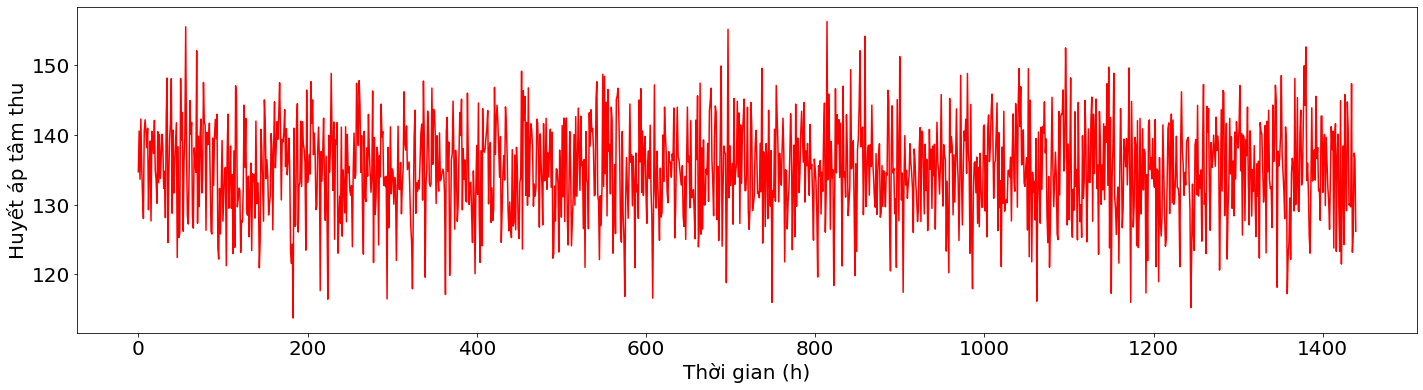

In [31]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize=(24,6))

plt.plot(np.arange(seq.shape[0]),seq,color = 'red')
plt.xlabel('Thời gian (h)')
plt.ylabel('Huyết áp tâm thu')

Ta áp dụng cửa sổ trượt với kích thước size = 24, dùng class Integrated_Mov_Average để tính trung bình tích phân động mỗi 24h. Cửa sổ này di chuyển theo chiều dài của time series cho đến vị trí 1440:

Lưu ý: Ta chỉ bắt đầu tính và ghi nhận giá trị trung bình khi cửa sổ bão hòa (đủ 24 giá trị), như vậy 23 giờ đầu tiên không có giá trị mới, nhưng từ giờ thứ 24, cứ mỗi giờ ta sẽ cập nhật được trung bình động của 24 h trước đó.

In [33]:
out = np.array([])

ima = Integrated_Mov_Average(24, float)

for i in seq:
    ima.add(i)
    if ima.count >= 24:
        out = np.append(out, ima.getInt_Average())

In [35]:
out.shape

(1417,)

Text(0, 0.5, 'Trung bình động HA/24h')

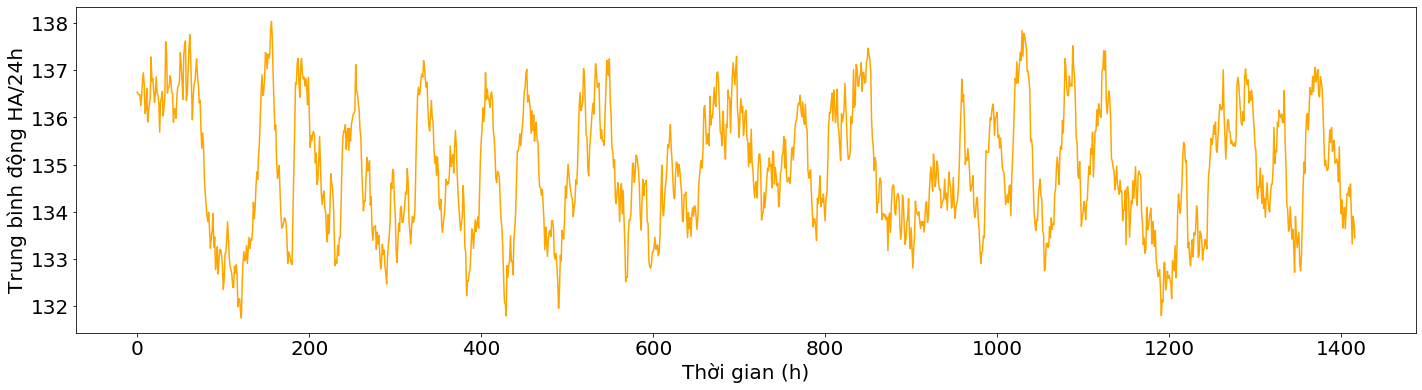

In [36]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize=(24,6))

plt.plot(np.arange(out.shape[0]),out,color = 'orange')
plt.xlabel('Thời gian (h)')
plt.ylabel('Trung bình động HA/24h')

Có một điều bạn có thể nhận ra, đó là tốc độ tính toán trung bình động là cực kì nhanh chóng, vì không chỉ do ta dùng numpy (ngôn ngữ C), mà còn do hiệu quả của vòng dữ liệu tuần hoàn, tất cả thao tác add, remove trong vòng này đều có hiệu suất O(1), tức là không phụ thuộc vào kích thước của vòng lẫn kích thước chuỗi thời gian.

Bài thực hành đến đây là hết, tạm biệt các bạn và hẹn gặp lần sau.